In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

### установка настройки графиков по умолчанию

In [3]:
sns.set_theme(
    font_scale = 2,                         # размер шрифта
    style      = 'whitegrid',               # стиль поля графика
    rc         = {'figure.figsize':(20,7)}  # размер фигуры
)

In [4]:
path_to_file = '/Users/varya_hai/Karpov.courses/{}'

In [5]:
sales_team  = pd.read_csv(path_to_file.format('sales_team_6.csv'))
order_leads = pd.read_csv(path_to_file.format('order_leads_6.csv'))
invoices    = pd.read_csv(path_to_file.format('invoices_6.csv'))

In [6]:
order_leads['Date'] = pd.to_datetime(order_leads.Date)

In [7]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [8]:
sales_team = sales_team.rename(columns={'Sales Rep':'sales_rep',
                                        'Sales Rep Id':'sales_rep_id',
                                        'Company Name':'company_name',
                                        'Company Id':'company_id'})

In [9]:
order_leads.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [10]:
invoices.head()

,Meal Id,Company Id,Date of Meal,Participants,Meal Price
0,QBGU1W8BRZZFHYUZ,D0AUXPP07H6AVSGD,2017-10-09 21:00:00,['Violet Medina'],598.0
1,QFNO07V7P3BTJSDK,D0AUXPP07H6AVSGD,2018-06-07 07:00:00,['Connie Harper'],89.0
2,ZDQ15BT9LLWUQ6M8,D0AUXPP07H6AVSGD,2014-12-18 20:00:00,['Arthur Lopez'],295.0
3,GL1ZVDU85Q9EO4TA,D0AUXPP07H6AVSGD,2018-03-05 12:00:00,['Violet Medina' 'Arthur Lopez'],193.0
4,42GWYA5XD8NVINY3,D0AUXPP07H6AVSGD,2017-06-17 08:00:00,['Arthur Lopez'],348.0


In [11]:
order_leads.columns

Index(['Order Id', 'Company Id', 'Company Name', 'Date', 'Order Value',
       'Converted'],
      dtype='object')

In [12]:
order_leads = order_leads.rename(columns={'Order Id':'order_id',
                                          'Company Id':'company_id',
                                          'Company Name':'company_name',
                                          'Order Value':'order_value',
                                          'Date':'date',
                                          'Converted':'converted'})

In [13]:
order_leads_with_team_data = order_leads.merge(sales_team, on=['company_id','company_name'], how='left')

In [14]:
order_leads_with_team_data.head()

,order_id,company_id,company_name,date,order_value,converted,sales_rep,sales_rep_id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [15]:
top_sales = order_leads_with_team_data\
    .groupby('sales_rep',as_index=False)\
    .agg({'converted':'mean'})\
    .sort_values('converted',ascending=False)\
    .head(10)

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10746/773953408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_sales,x='sales_rep',y='converted',palette='muted')
/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10746/773953408.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_sales.sales_rep,rotation=45)
/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10746/773953408.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


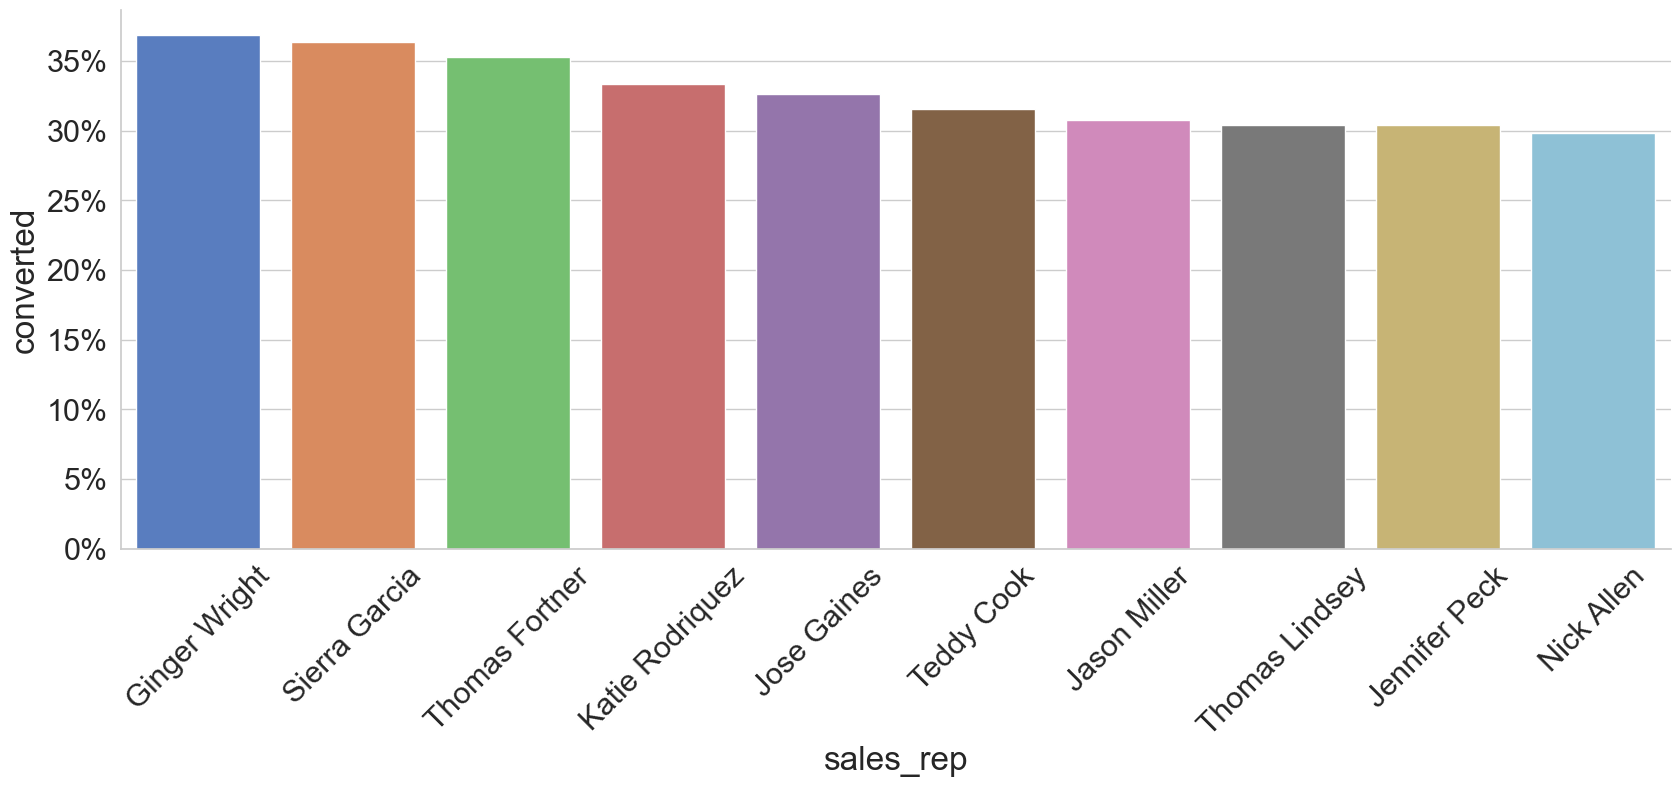

In [17]:
ax = sns.barplot(data=top_sales,x='sales_rep',y='converted',palette='muted')
ax.set_xticklabels(top_sales.sales_rep,rotation=45)
ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])

sns.despine()

In [18]:
cr_by_day_rolling = order_leads\
    .groupby('date')\
    .agg({'converted':'mean'})\
    .rename(columns={'converted':'CR'})\
    .sort_values('date')\
    .rolling(30).mean()

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10746/3964278073.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


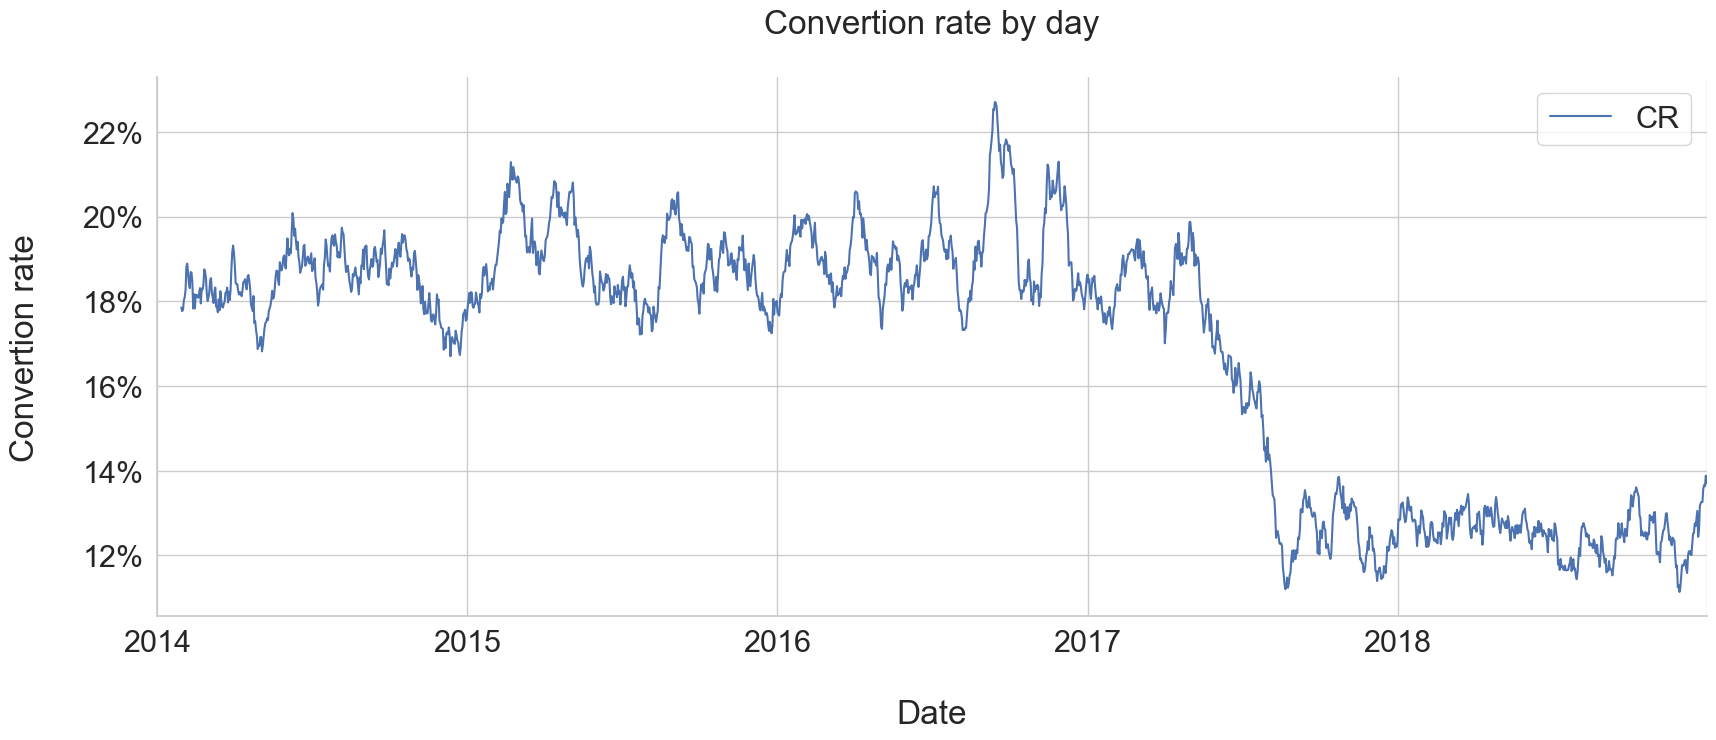

In [21]:
ax = cr_by_day_rolling.plot()

ax.set_title('Convertion rate by day\n')
ax.set_ylabel('Convertion rate\n')
ax.set_xlabel('\nDate')

ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])

sns.despine() # убираем лишние строки в выводе

In [22]:
def get_plot(df,x_label='',y_label='',title=''):
    ax = df.plot()
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])
    sns.despine()

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10746/802501647.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(n) for n in ax.get_yticks()])


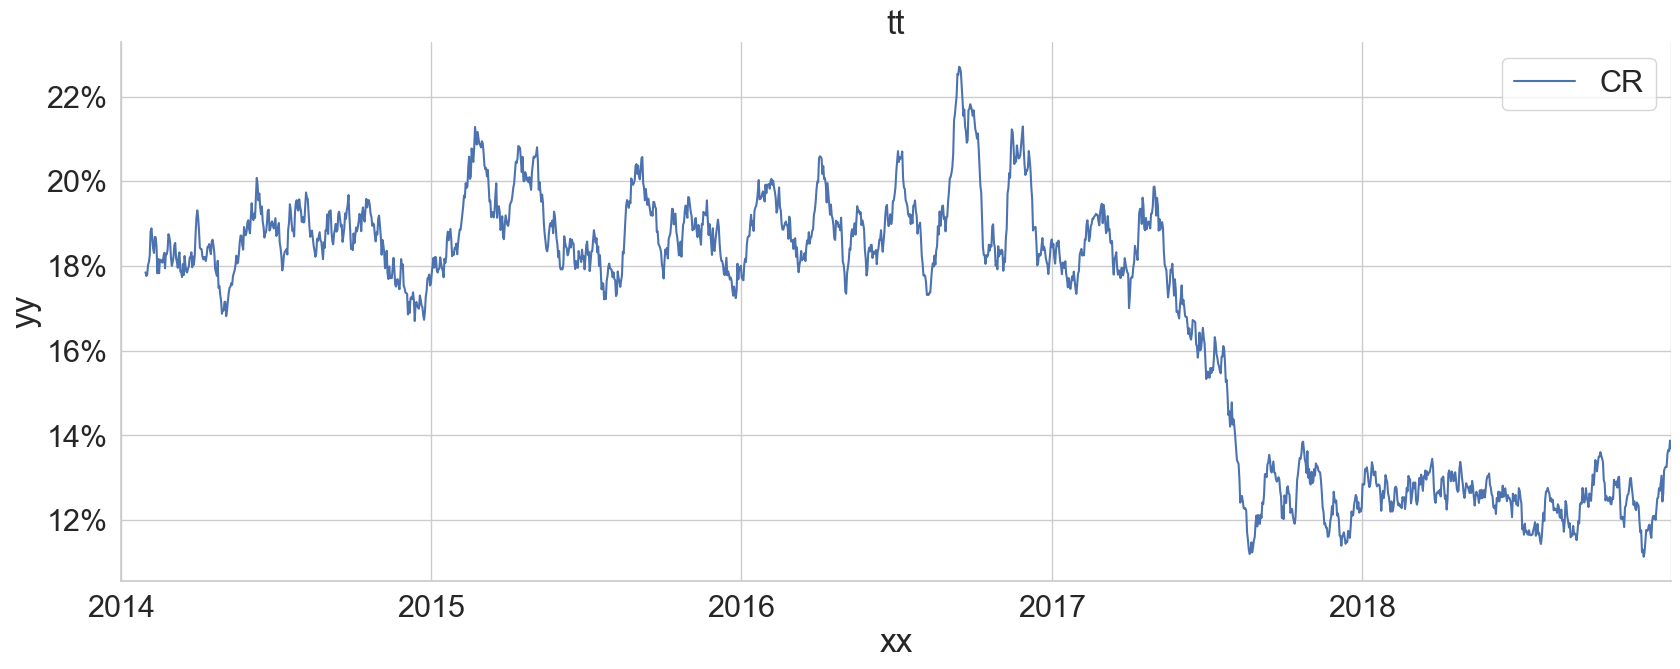

In [23]:
get_plot(cr_by_day_rolling,'xx','yy','tt')

In [24]:
fig = px.line(cr_by_day_rolling.reset_index().dropna(),x='date',y='CR',title='')
fig.show()

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


# Задания

In [26]:
avocado_mean = pd.read_csv("https://stepik.org/media/attachments/lesson/362453/avocado_mean.csv",
                           index_col=0, parse_dates=['Date'])

In [27]:
avocado_mean.head()

,AveragePrice
Date,
2015-01-04,1.301296
2015-01-11,1.370648
2015-01-18,1.391111
2015-01-25,1.397130
2015-02-01,1.247037


In [28]:
avocado_mean\
    .rolling(3).mean()\
    .sort_values(ascending=False)\
    .head(1)\
    .round(2)

TypeError: sort_values() missing 1 required positional argument: 'by'

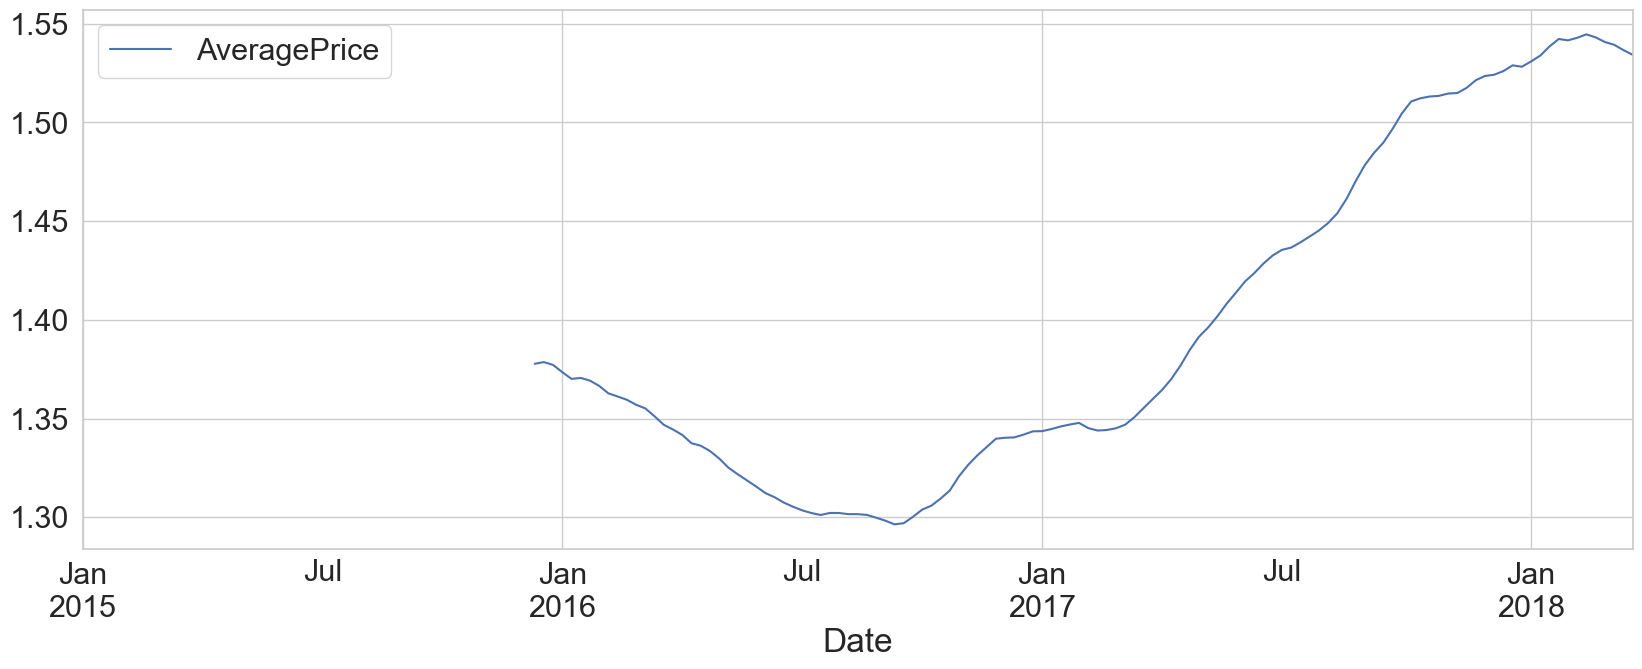

In [29]:
ax = avocado_mean\
    .rolling(50).mean()\
    .plot()

#ответ: а) 2, b) 50, c) 10, d) 4

min_periods - минимальное число наблюдений находящихся в окне необходимых для подсчета значения (если меньше - возвращает NA)
              Значение по умолчанию равно размеру окна
<br> win_type    - тип окна, если None, то все наблюдения имеют равный вес
<br>closed      - сделать интервал закрытым слева, справа, на обеих или ни на одной точке. По умолчанию используется значение "справа"
              Для фиксированных - "оба"
<br>on          - колонка, на основе которой считать скользящее окно, если не на основе индексов
<br>axis        - ось (столбцы или строки)
<br>window      - размер окна, число наблюдений используемых для подсчета какой-либо статистики
<br>center      - позволяет использовать центрированное среднее 

In [30]:
avocado_ewm = avocado_mean.ewm(span=2).mean()

In [34]:
df = pd.read_csv('/Users/varya_hai/Karpov.courses/avocado_full.csv',index_col=0)

df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


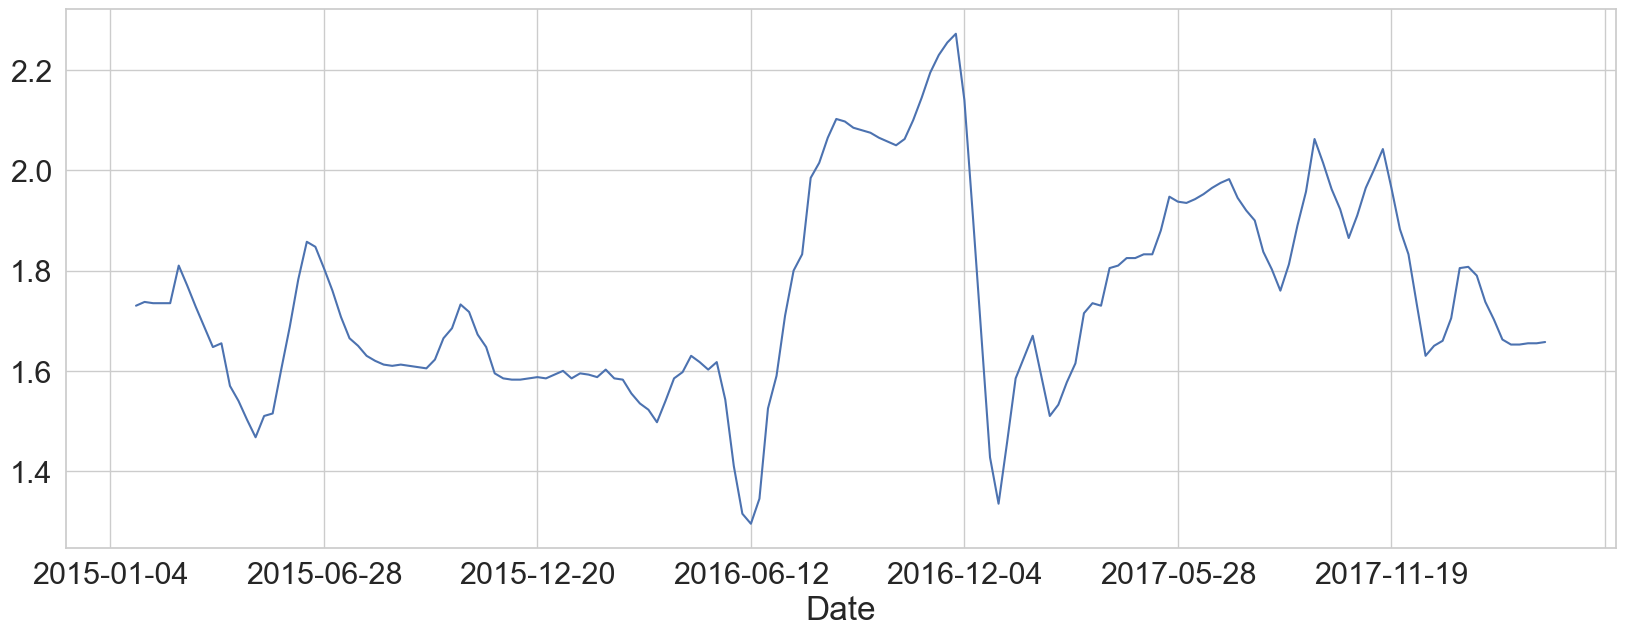

In [45]:
ax = df\
    .query('type=="organic" & region=="Chicago"')\
    .AveragePrice\
    .rolling(4).mean()\
    .plot()

<AxesSubplot:xlabel='Date'>

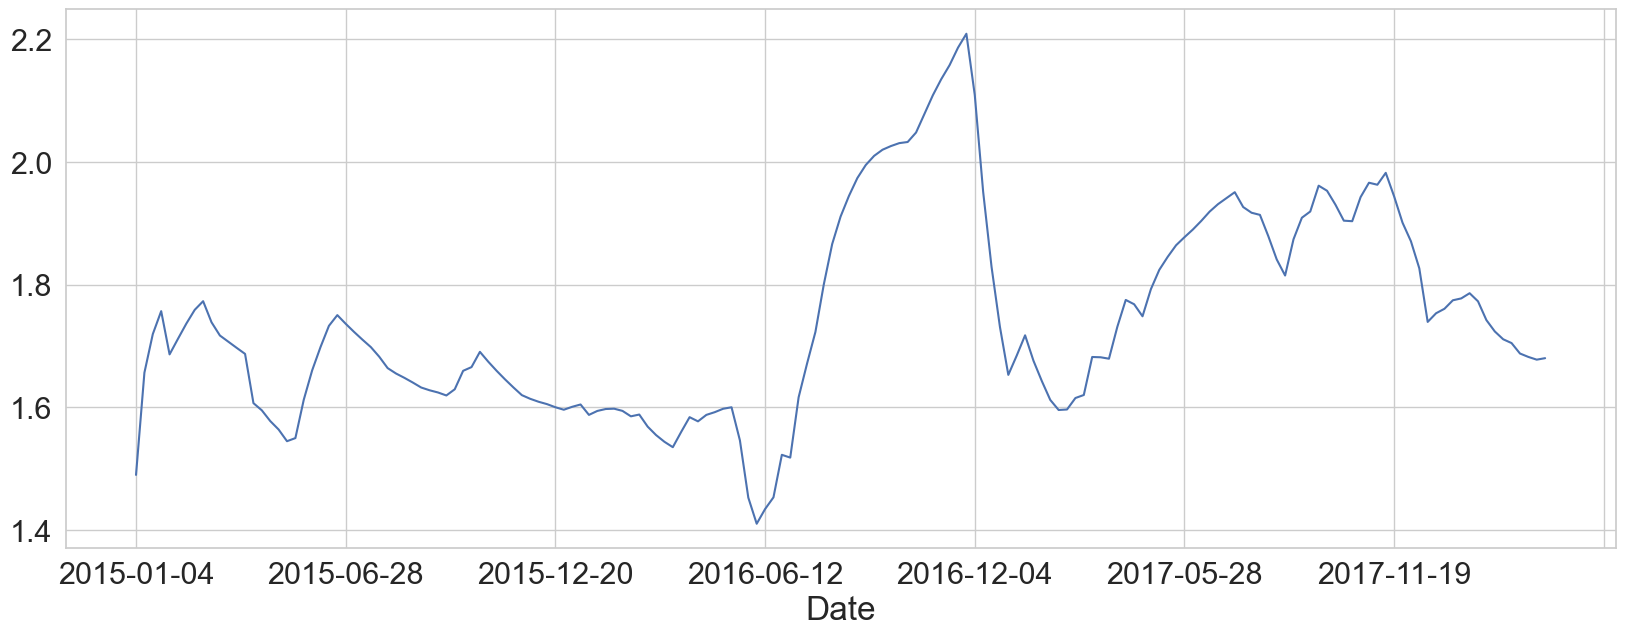

In [46]:
df\
    .query('type=="organic" & region=="Chicago"')\
    .AveragePrice\
    .ewm(4).mean()\
    .plot()

In [47]:
delays = pd.read_csv(path_to_file.format('delays.csv'))

In [48]:
delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,-1 days -14:57:48.000000000,705436
1,7614,9544,-4 days -02:14:23.000000000,859266
2,2052,2427,-0 days -06:08:57.000000000,812416
3,9635,8054,-0 days -23:40:19.000000000,162312
4,8154,5503,-1 days -13:21:53.000000000,658844


In [49]:
delays.delay = delays.delay.str.replace('-','')
delays.delay = pd.to_timedelta(delays.delay)

In [50]:
delays.head()

,client_id,company_id,delay,revenue
0,2389,4240,1 days 14:57:48,705436
1,7614,9544,4 days 02:14:23,859266
2,2052,2427,0 days 06:08:57,812416
3,9635,8054,0 days 23:40:19,162312
4,8154,5503,1 days 13:21:53,658844


In [51]:
delay_categorical = pd.cut(delays.delay,bins=pd.to_timedelta(['0d', '1d','2d','3d','1000d']),labels=['less than 1 day','1-2 days','2-3 days','more than 3 days'])

In [52]:
delay_categorical.head()

0            1-2 days
1    more than 3 days
2     less than 1 day
3     less than 1 day
4            1-2 days
Name: delay, dtype: category
Categories (4, object): ['less than 1 day' < '1-2 days' < '2-3 days' < 'more than 3 days']

In [53]:
delays['delay_categorical'] = delay_categorical

In [54]:
delays.head()

,client_id,company_id,delay,revenue,delay_categorical
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,more than 3 days
2,2052,2427,0 days 06:08:57,812416,less than 1 day
3,9635,8054,0 days 23:40:19,162312,less than 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


In [55]:
px.bar(data_frame=delays,x='delay_categorical')

# Минипроект

In [56]:
ads_data = pd.read_csv('/Users/varya_hai/Karpov.courses/6_ads/ads_data.csv',parse_dates=['date','time'])

In [57]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [58]:
ads_clients_data = pd.read_csv('/Users/varya_hai/Karpov.courses/6_ads/ads_clients_data.csv',parse_dates=['date','create_date'])

In [59]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [60]:
ads_events = ads_data\
    .groupby(['ad_id','event'],as_index=False)\
    .agg({'time':'count'})\
    .rename(columns={'time':'count'})\
    .pivot(index='ad_id',columns='event',values='count')\
    .fillna(0)\
    .reset_index()\
    .astype('int')

In [61]:
ads_events.head()

event,ad_id,click,view
0,2,1,101
1,3,3,184
2,1902,1,41
3,2064,0,35
4,2132,1,58


### 2

Давайте посмотрим на распределение показов объявлений!

•	По оси x – число показов

•	По оси y – доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения


In [62]:
ads_data.loc[ads_data.event=='view'].ad_id.value_counts().head()

ad_id
112583    351802
107729    184596
107837     51996
28142      24152
45008      19668
Name: count, dtype: int64

In [63]:
log_views = np.log(ads_data.loc[ads_data.event=='view'].ad_id.value_counts())

In [64]:
log_views.head()

ad_id
112583    12.770824
107729    12.125925
107837    10.858922
28142     10.092122
45008      9.886748
Name: count, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Density'>

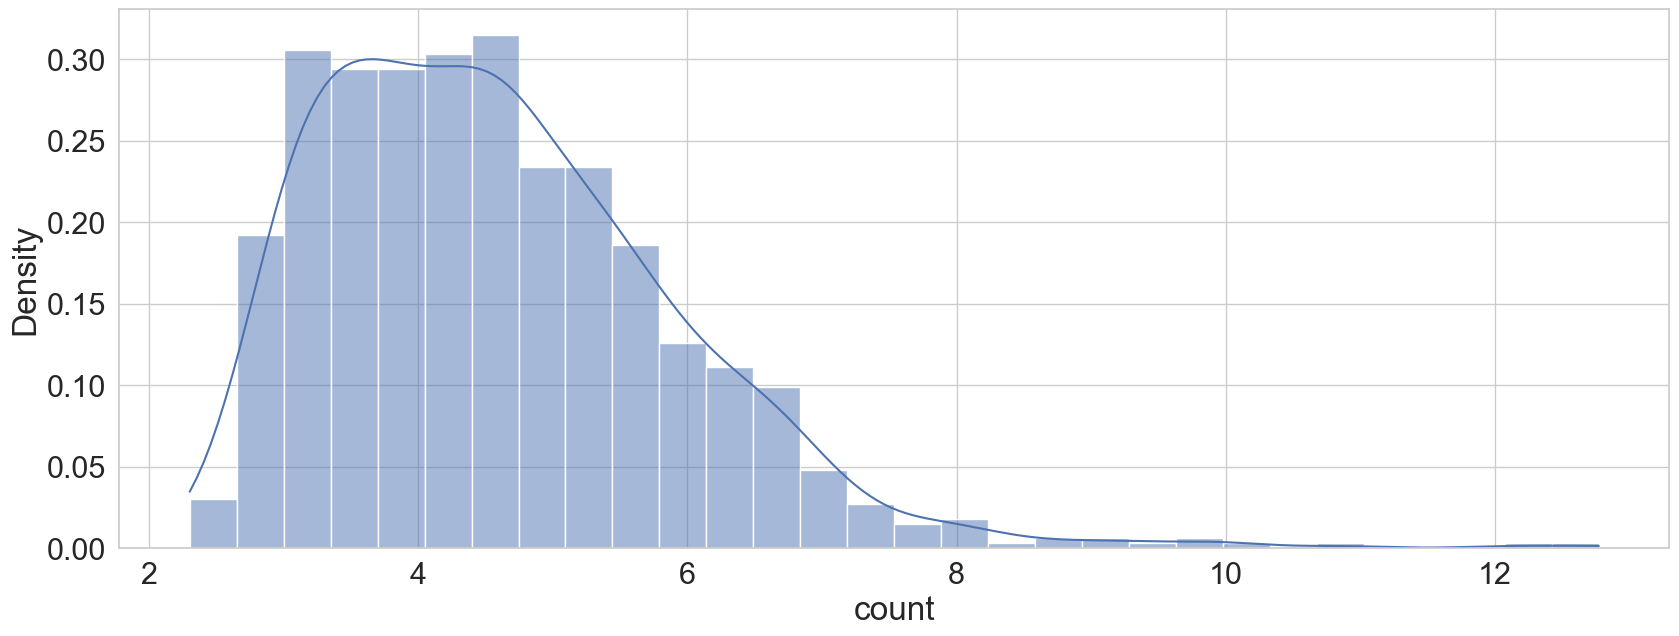

In [65]:
sns.histplot(data=log_views,kde=True,stat='density')

### 3

Теперь нужно найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

Вопрос: Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [66]:
daily_ad_views = ads_data\
                          .loc[ads_data.event=='view']\
                          .pivot_table(index='ad_id',
                                       columns='date',
                                       values='time',
                                       aggfunc='count')


daily_ad_views.head()

# То же самое, но другим способом: 

#daily_ad_views = ads_data\
#                        .query('event=="view"')\
#                        .groupby(['date','ad_id'],as_index=False)\
#                        .agg({'event':'count'})\
#                        .pivot(index='ad_id',columns='date',values='event')

date,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-06
ad_id,,,,,,
2,83.0,18.0,NaN,NaN,NaN,NaN
3,158.0,26.0,NaN,NaN,NaN,NaN
1902,NaN,NaN,34.0,7.0,NaN,NaN
2064,NaN,28.0,7.0,NaN,NaN,NaN
2132,NaN,NaN,25.0,27.0,6.0,NaN


In [67]:
mean_views = daily_ad_views.mean()

mean_views

date
2019-04-01    154.482270
2019-04-02    137.786982
2019-04-03    163.952778
2019-04-04    675.901720
2019-04-05    919.109677
2019-04-06    277.122727
dtype: float64

In [68]:
rolling_daily = daily_ad_views.mean().rolling(2).mean().round(0)

rolling_daily

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

### 4

Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

<AxesSubplot:xlabel='date'>

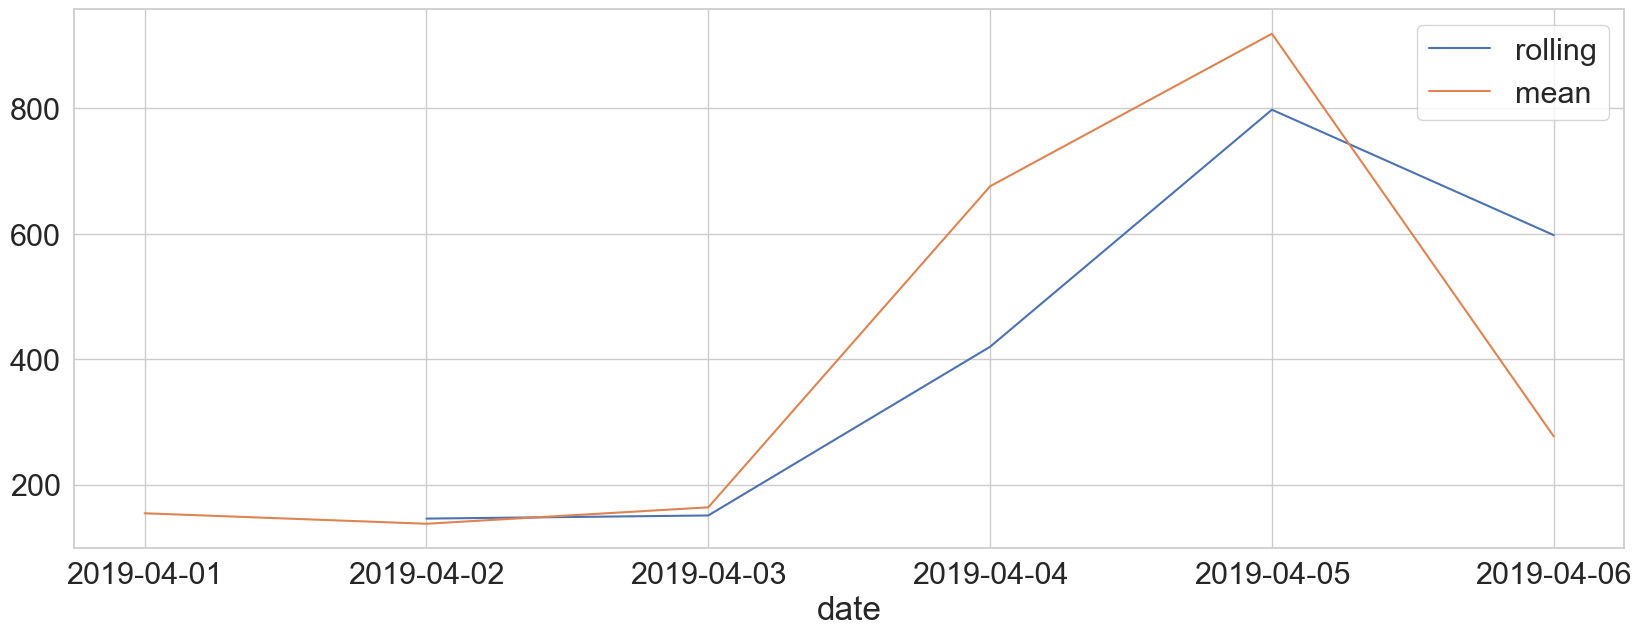

In [69]:
sns.lineplot(data=rolling_daily,label='rolling')
sns.lineplot(data=mean_views,label='mean')

### 5

Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (create_date) и первым запуском рекламного объявления этим клиентом (date).

В качестве ответа укажите среднее число дней

In [70]:
merged = ads_data.merge(ads_clients_data,on='client_union_id',suffixes=['_ad_data','_client_data'])

merged.head()

,date_ad_data,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_client_data,community_id,create_date
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269,2020-05-07,-130129582,2018-12-04
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011,2020-05-07,-130337958,2018-12-25
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410,2020-05-07,-130393498,2018-11-13
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711,2020-05-07,-130929771,2018-08-18
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501,2020-05-07,-130021201,2019-02-22


In [71]:
merged['difference'] = merged.date_ad_data - merged.create_date

In [72]:
first_ad = merged.groupby('client_union_id').difference.min()

first_ad

client_union_id
1         98 days
9        114 days
13        66 days
16       105 days
20        32 days
           ...   
122004    67 days
122013   151 days
122023   126 days
122031    96 days
122078    71 days
Name: difference, Length: 838, dtype: timedelta64[ns]

In [73]:
first_ad.mean().days

124

### 6

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

50/1000∗100=5%

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day'))

Ответ дайте в процентах и округлите до сотых. Пример ответа: 34.69

NB! У нас могут быть люди, которые не сделали рекламу вообще. Не забудьте их учесть :)

In [74]:
round(len(first_ad.loc[first_ad.dt.days<=365]) / ads_clients_data.client_union_id.nunique() * 100,2)

0.69

### 7

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. Создать временные промежутки можно с помощью pd.to_timedelta().


In [75]:
binned_first = pd.cut(first_ad,
       bins=pd.to_timedelta(['0d','30d','90d','180d','365d']),
       labels=['between 0 and 30','between 30 and 90','between 90 and 180','between 180 and 365'])\
       .value_counts()

binned_first

difference
between 90 and 180     396
between 30 and 90      263
between 180 and 365    168
between 0 and 30        11
Name: count, dtype: int64

### 8

И последнее задание: постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления). Расположите их так, чтобы внизу была самая малочисленная, а наверху – самая большая.

In [76]:
px.bar(data_frame=binned_first)

# Дополнительный проект

In [77]:
import re

In [78]:
fly_gen = pd.read_csv('/Users/varya_hai/Karpov.courses/gff.tsv',sep='\t')

fly_gen.head()

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1


### 1

Какое значение атрибута Parent самое частое?

In [79]:
fly_gen.attributes.str.extract(r'Parent=(?P<parent>[\w\.]+)').value_counts()

parent        
XM_001475631.1    479
NC_000083.5        33
Name: count, dtype: int64

In [80]:
fly_gen.attributes.str.split(r'Parent=',expand=True)[1].str.strip(',').value_counts()

1
XM_001475631.1              479
NC_000083.5:LOC100040603     33
Name: count, dtype: int64

### 2

Какое самое частое значение в колонке type?

In [81]:
fly_gen.type.value_counts()

type
exon               201
CDS                170
five_prime_UTR      47
mRNA                33
three_prime_UTR     32
protein             29
Name: count, dtype: int64